<h1 align="center">Linear Regression</h1>

## Import libraries

In [413]:
import math
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

## Model

### Utils

In [414]:
def mse(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """
    Mean Squared Error (MSE)

    Parameters
    ----------
    y_true : np.ndarray
        True values
    y_pred : np.ndarray
        Predicted values

    Returns
    -------
    float
        Mean Squared Error
    """
    return np.mean((y_true - y_pred) ** 2)

In [415]:
def load_data(path: str) -> np.ndarray:
    """
    Load data from a file

    Parameters
    ----------
    path : str
        Path to the file

    Returns
    -------
    np.ndarray
        Data
    """
    data = np.loadtxt(path, delimiter=",")
    X = data[:, 0]
    y = data[:, 1]
    return X, y

### Linear Regression class

In [416]:
class LinearRegression:
    def __init__(self, lr: float = 0.01) -> None:
        """
        Initialize the Linear Regression model

        Parameters:
        ----------
        lr: float
            Learning rate for the model
        """
        self.lr = lr

        self.weights: np.ndarray
        self.bias: np.float64

        self.loss: list = []
        self.accuracy: list = []

    def fit(
        self, X: np.ndarray, y: np.ndarray, n_iters: int = 1000, verbose: bool = False
    ) -> None:
        """
        Fit the model to the data

        Parameters:
        ----------
        X: np.ndarray
            Input data
        y: np.ndarray
            Target data
        n_iters: int
            Number of iterations to train the model
        verbose: bool
            Whether to print the loss at each iteration
        """
        n_features = X.shape[1]

        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(n_iters):
            dw, db = self.compute_gradient(X, y, self.weights, self.bias)
            self.loss.append(self.cost(X, y))

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            if verbose and i % math.ceil(n_iters / 10) == 0:
                print(f"Epoch {i}, Loss: {np.mean(self.loss[i])}")

    def compute_gradient(self, x, y, w, b):
        """
        Computes the gradient for linear regression

        Prarameters:
        ----------
        x (ndarray): Shape (m,) Input to the model (Population of cities)
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w, b (scalar): Parameters of the model

        Returns
        -------
        dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
        dj_db (scalar): The gradient of the cost w.r.t. the parameter b
        """
        n_samples = x.shape[0]

        dj_dw = 0
        dj_db = 0

        for i in range(n_samples):
            y_pred = w * x[i] + b
            dj_dw += (y_pred - y[i]) * x[i]
            dj_db += y_pred - y[i]

        return dj_dw / n_samples, dj_db / n_samples

    def cost(self, X: np.ndarray, y: np.ndarray) -> np.float64:
        n_samples = X.shape[0]
        total_cost = 0

        for i in range(n_samples):
            y_pred = self.weights * X[i] + self.bias
            total_cost += (y_pred - y[i]) ** 2

        return ((1 / (2 * n_samples)) * total_cost).round(2)

    def predict(self, X: np.ndarray) -> np.ndarray:
        y_pred = self.weights * X + self.bias
        return y_pred

    def score(self, X: np.ndarray, y: np.ndarray) -> np.float64:
        y_pred = self.predict(X)
        return np.mean((y - y_pred) ** 2)

## Train model

In [417]:
X, y = load_data("data/city.txt")
X = X.reshape(-1, 1)

In [418]:
model = LinearRegression(lr=0.01)
model.fit(X, y, n_iters=1500, verbose=True)

Epoch 0, Loss: 32.07
Epoch 150, Loss: 5.31
Epoch 300, Loss: 4.96
Epoch 450, Loss: 4.76
Epoch 600, Loss: 4.64
Epoch 750, Loss: 4.57
Epoch 900, Loss: 4.53
Epoch 1050, Loss: 4.51
Epoch 1200, Loss: 4.5
Epoch 1350, Loss: 4.49


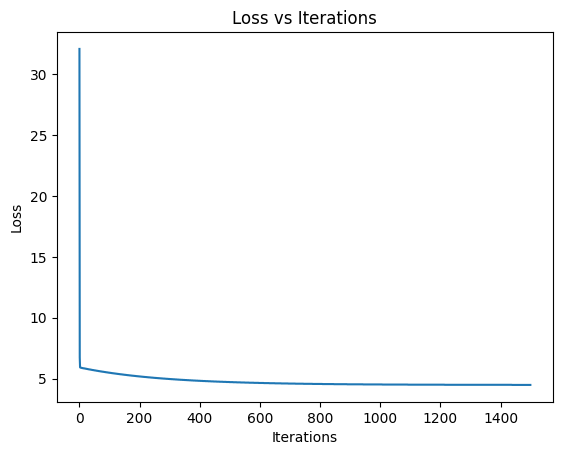

In [419]:
plt.plot(model.loss)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs Iterations")
plt.show()

In [420]:
y_pred = model.predict(X)

Text(0.5, 0, 'Population of City in 10,000s')

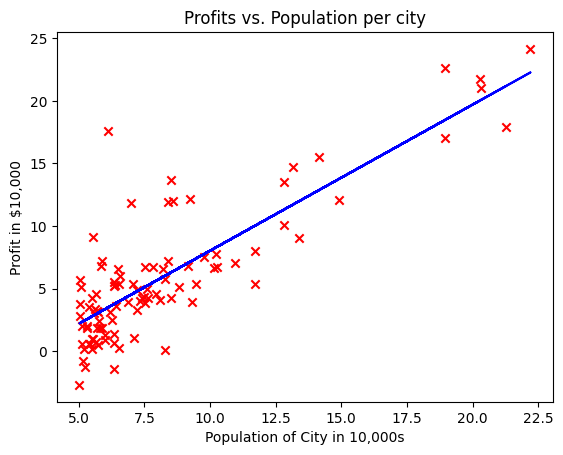

In [421]:
plt.plot(X, y_pred, c="b")
plt.scatter(X, y, marker="x", c="r")
plt.title("Profits vs. Population per city")
plt.ylabel("Profit in $10,000")
plt.xlabel("Population of City in 10,000s")

In [422]:
X_test = np.array([3.5, 7])
predicts = model.predict(X_test)

for x, predict in zip(X_test, predicts):
    print(f"For population = {x * 10000}, we predict a profit of ${predict*10000:.2f}")

For population = 35000.0, we predict a profit of $4519.77
For population = 70000.0, we predict a profit of $45342.45
